# 时间序列分析

就餐饮企业而言，经常会碰到如下问题。由于餐饮行业是生成和销售同时进行的，因此销售预测对于餐饮企业十分必要。如何让基于菜品历史销售数据，做好餐饮销售预测？
 * 以便减少菜品脱销现象和避免因备料不足而造成的生产延误，从而减少菜品生成等待时间，提供给客户更优质的服务
 * 可以减少安全库存量，降低物流成本。

餐饮销售预测可以看作是基于时间序列的短期数据预测，预测对象为具体菜品销售量。

## 1. 时间序列算法

时间序列预测常用按时间顺序排列的一组随机变量X1,X2,...,Xt来表示一个随机事件的时间序列，简记为{Xt}；用x1,x2,...,xn表示该随机序列的n个有序观察值，称之为序列长度为n的观察值序列。

常用的时间序列算法如下：
1. 平滑法：平滑法常用语趋势分析和预测，利用修匀技术，削弱短期随机波动对序列的影响，是序列平滑化。根据所用平滑技术的不同，可具体分为移动平均法和指数平滑法。
2. 趋势拟合法：趋势拟合法把时间作为自变量，相应的序列观察值作为因变量，建立回归模型，根据序列的特征，可具体分为线性拟合和曲线拟合
3. 组合模型：时间序列的变化主要受到长期趋势（T）、季节变动（S）、周期变动（C）和不规则变动（e）这4个因素的影响。根据序列的特点，可以构建加法模型和乘法模型。
  * 加法模型：xt = T + S + C + e
  * 乘法模型：xt = T x S x C x e
4. AR、MA、ARMA、ARIMA模型：
5. ARCH/GARCH模型：

## 2. 时间序列的预处理

拿到一个观察值序列后，首先要对它的纯随机性和平稳性进行检验，这两个重要的检验称为序列的预处理。根据检验结果可以将序列分为不同的类型，对不同类型的序列会采取不同的分析方法。
* 纯随机序列：又称为白噪声序列，序列的各项之间没有任何相关关系，序列在进行完全无序的随机波动，可以终止对该序列的分析。白噪声序列是没有信息可提取的平稳序列。
* 平稳非随机序列：对于平稳非白噪声序列，它的均值和方差是常数，现已有一套平稳序列的建模方法。通常是建立一个线性模型来拟合该序列的发展，借此提取该序列的有用信息。ARMA模型是最常用的平稳序列拟合模型。
* 非平稳非随机序列：对于非平稳序列，由于它的均值和方差不稳定，处理方法一般是将其转变为平稳序列，这样就可以应用有关平稳时间序列的分析方法，如建立ARMA模型来进行相应的研究。如果一个时间序列经差分运算后具有平稳性，则该序列为差分平稳序列，可以使用ARIMA模型进行分析。
  * 如果差分之后非平稳序列变为平稳序列，则称为差分平稳序列


### 2.1. 平稳性检验
平稳时间序列的定义：对于随机变量X，可以计算其均值、方差；对于两个随机变量X和Y，可以计算X，Y的协方差和相关系数。

如果时间序列的均值和方差在一常数附件波动且波动范围有限，并且延迟K期的序列变量的自协方差和自相关系数是相等的或者说延迟K期的序列变量之间的影响程度是一样的。则称为平稳序列。

### 2.2. 纯随机性检验
如果一个序列是纯随机序列，那么它的序列值之间应该没有任何关系，即满足自协方差等于零，等于零是理想状态，通常是接近于零。

## 3. 餐厅销售数据分析
随着销售业绩的增长，餐厅的销量数据属于非平稳序列，但是如果是稳定增长，那么经过差分之后，餐厅的销量可能又会变成平稳序列。



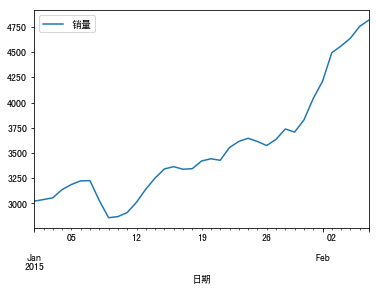

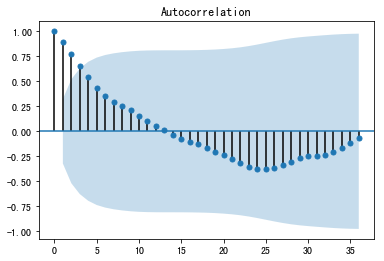

原始序列的ADF检验结果为： (1.8137710150945274, 0.99837594215142644, 10, 26, {'1%': -3.7112123008648155, '5%': -2.9812468047337282, '10%': -2.6300945562130176}, 299.46989866024177)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

input_file = '../data/arima_data.xls'
forecast_num = 5

data = pd.read_excel(input_file, index_col = u'日期')
data.plot()
plt.show()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(data[u'销量']))

时序图显示出该序列具有明显的递增趋势，可以判断为非平稳序列。从自相关图现实自相关系数有很长一段时间大于零，说明序列间具有很强的长期相关性。

且单位根检验统计量对应的P值显著大于0.05，说明该序列为非平稳序列。

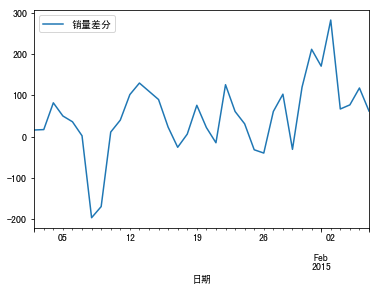

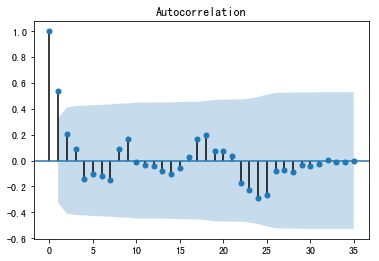

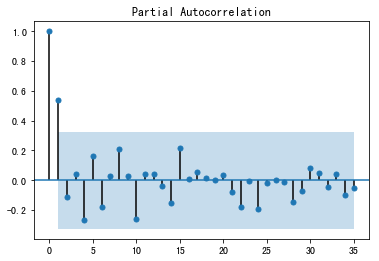

差分序列的ADF检验结果为： (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.59090907803341)
差分序列的白噪声检验结果为： (array([ 11.30402222]), array([ 0.00077339]))


In [12]:
diff_data = data.diff().dropna()
diff_data.columns = [u'销量差分']
diff_data.plot()
plt.show()

plot_acf(diff_data)
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff_data)
plt.show()

print(u'差分序列的ADF检验结果为：', ADF(diff_data[u'销量差分']))

from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(diff_data, lags=1))

一阶差分后的序列的时序图在均值附件比较平稳的波动、自相关图又很强的短期相关性，单位根检验P值小于0.05，所以一阶差分之后的序列是平稳序列。

对一阶差分后的序列做白噪声检验，输出的P值小于0.05，所以一阶差分之后的序列是平稳非白噪声序列。

In [113]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
time_series = data[u'销量'].astype(np.float64)

pmax = qmax = int(len(diff_data) / 10)
bic_matrix = []

for p in range(pmax + 1):
    tmp = []
    for q in range (qmax + 1):
        try:
            tmp.append(ARIMA(time_series, order = (p, 1, q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix)
print(bic_matrix)
p,q = bic_matrix.stack().idxmin()
print(u'BIC最小的p值和q值分别为：%s、%s' % (p, q))

model = ARIMA(time_series, (p, 1, q)).fit()
# model.summary2()
forecast_result = model.forecast(forecast_num)
print(forecast_result[0])

/Users/yingrui/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/yingrui/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yingrui/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/yingrui/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/Users/yingrui/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/Users/ying

            0           1           2           3
0  432.068472  422.510082  426.088911  426.595507
1  423.628276  426.073601         NaN         NaN
2  426.774824         NaN         NaN         NaN
3  430.317524         NaN         NaN  436.478109
BIC最小的p值和q值分别为：0、1
[ 4873.96659946  4923.92274066  4973.87888186  5023.83502307  5073.79116427]


predicted=3662.077006, expected=3827.000000
predicted=3948.119388, expected=4039.000000
predicted=4122.860510, expected=4210.000000
predicted=4305.721853, expected=4493.000000
predicted=4670.044334, expected=4560.000000
predicted=4523.069740, expected=4637.000000
predicted=4753.116852, expected=4755.000000
predicted=4805.198580, expected=4817.000000


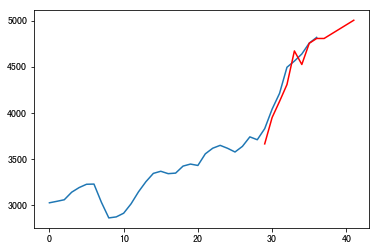

In [114]:
input_X = time_series
size = int(len(input_X) * 0.8)
train, test = input_X[0:size], input_X[size:len(input_X)]
history = [x for x in train]
predictions = list()

model_fit = None

for t in range(len(test)):
    model = ARIMA(history, order=(p, 1, q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat[0], obs))
    
fig, ax = plt.subplots()

forecast_five_more = model_fit.forecast(5)[0]
for forecast in forecast_five_more:
    predictions.append(np.array([forecast]))
df = pd.DataFrame(predictions)
df.index += size

ax.plot(np.array(time_series))    
ax.plot(df, color='red')
plt.show()

## 作业

1. 请对../data/AirPassengers.csv中的航空公司乘客数据进行时间序列分析